미세먼지

종합실습1 목적: 
- 대기 중 오염물질과 기상정보 데이터를 바탕으로    
 '2019년 7월 1일' - ' 2020년 6월 30일' 기간에서   
 서울시 미새먼지 발생/증가에 영향을 미치는 인자를 도출하고   
 그 영향도를 분석하고자 합니다.   

프로젝트 기간: 2023.3.13 - 2022.3.14

### step 0 데이터 수집:

In [432]:
# 데이터 구성: Series, DataFrame
import pandas as pd 
# 행렬 계산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# from statsmodels.formula.api import ols
# from statsmodels.api import qqplot, add_constant
# import statsmodels.formula.api as smf

# from statsmodels.tools.eval_measures import rmse

In [433]:
# 한글 폰트 (맑은 고딕) 적용
matplotlib.rc('font',family='Malgun Gothic')
matplotlib.rc('axes',unicode_minus=False)

일단 가정 먼저 해야 할것은...   
실습 데이터의 설명파일을 확인해야 한다고 생각했습니다.  



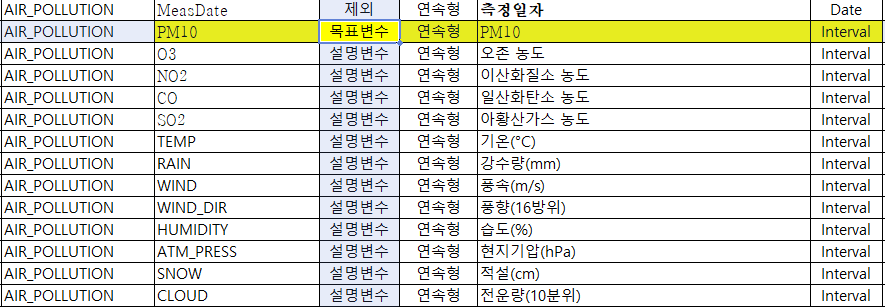

In [434]:
from IPython.display import Image
Image("./1.png")

- 목표변수와 설명변수를 확인할수 있습니다.  
    - 목표변수: PM10  
    - 설명변수:
        - O3(오존농도)
        - NO2(이산화질소 농도)
        - CO(이산화질소 농도)
        - SO2(아황산가스 농도)
        - TEMP(기온)
        - RAIN(강수량mm)
        - WIND
        - WIND_DIR(풍향16방위)
        - HUMIDITY(습도%)
        - ATM_PRESS(현지기압hPa)
        - SNOW(적설cm)
        - CLOUD(전운량10분위)  
  
  
    
- 모든 변수들은 연속형입니다 (회귀)



### step1. data구성하기

In [435]:
df_raw = pd.read_csv("./AIR_POLLUTION.csv", engine="python")
df_raw.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,RAIN_WEIGHT,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,SNOW_WEIGHT,CLOUD,TRAFIC,WEATHER
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0,0.0,2.30,249,63.2,995.1,0,0.0,5.70,9433883,2
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0,0.0,2.26,265,63.2,998.6,0,0.0,3.83,9723027,2
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0,0.0,1.79,280,65.3,998.3,0,0.0,6.29,9630786,2
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0,0.0,2.04,263,58.6,996.6,0,0.0,2.54,9871781,2
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0,0.0,1.45,175,45.5,993.5,0,0.0,3.92,10155245,2


In [436]:
df_raw.shape

(366, 18)

데이터는 변수 14개, 자료수 366개로 구성되어 있습니다

In [438]:
df_raw.describe()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,RAIN_WEIGHT,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,SNOW_WEIGHT,CLOUD,TRAFIC,WEATHER
count,365.000000,365.000000,365.000000,311.000000,365.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000
mean,33.421918,0.023600,0.026814,0.517042,0.003033,13.863798,0.311475,0.381639,2.225301,209.450820,60.295082,1005.848907,0.016393,0.022951,5.064016,9.372055e+06,2.494536
std,15.937983,0.011896,0.010271,0.152820,0.000632,9.830280,0.463731,1.122127,0.723171,70.735018,14.534983,8.126823,0.127157,0.222361,2.986119,8.454861e+05,1.119551
min,5.000000,0.002000,0.008000,0.300000,0.002000,-7.950000,0.000000,0.000000,0.940000,50.000000,17.900000,983.800000,0.000000,0.000000,0.000000,6.148809e+06,1.000000
25%,22.000000,0.014000,0.019000,0.400000,0.003000,5.492500,0.000000,0.000000,1.722500,160.250000,49.650000,999.400000,0.000000,0.000000,2.510000,9.126577e+06,1.250000
50%,31.000000,0.023000,0.025000,0.500000,0.003000,14.000000,0.000000,0.000000,2.095000,221.000000,61.050000,1006.450000,0.000000,0.000000,5.310000,9.652282e+06,2.000000
75%,42.000000,0.032000,0.034000,0.600000,0.003000,23.070000,1.000000,0.115000,2.620000,266.000000,69.950000,1011.575000,0.000000,0.000000,7.570000,9.948480e+06,3.000000
max,101.000000,0.062000,0.059000,1.000000,0.005000,31.720000,1.000000,11.800000,5.880000,351.000000,95.000000,1025.500000,1.000000,3.200000,10.000000,1.052804e+07,4.000000


In [439]:
df_raw.isnull().sum()

MeasDate        0
PM10            1
O3              1
NO2             1
CO             55
SO2             1
TEMP            0
RAIN            0
RAIN_WEIGHT     0
WIND            0
WIND_DIR        0
HUMIDITY        0
ATM_PRESS       0
SNOW            0
SNOW_WEIGHT     0
CLOUD           0
TRAFIC          0
WEATHER         0
dtype: int64

<AxesSubplot:>

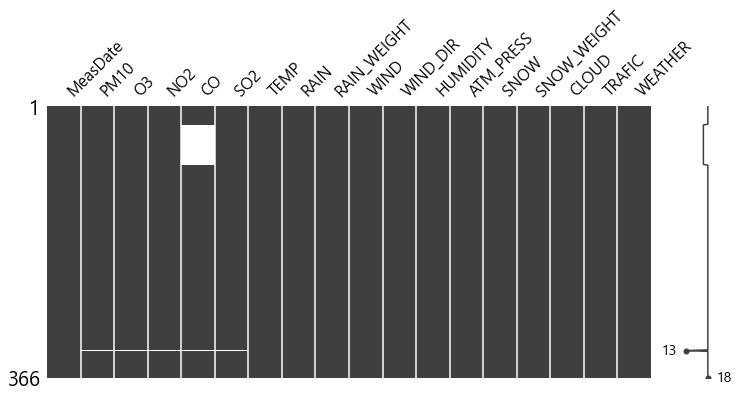

In [440]:
# 결측값 시각화로 보기 
import missingno as msno
msno.matrix(df_raw, figsize=(12,5))

결측치 확인 결과,  
1. CO(일산화탄소 농도)변수에 55개의 결측치가 존재 합니다. (설명변수)  
2. PM10(미세먼지 발생량)변수에 1개의 결측치가 존재합니다. (목표변수)
2. O3(오존 농도)변수에 1개의 결측치가 존재합니다. (설명변수)  
2. NO2(이산화질수 농도)변수에 1개의 결측치가 존재합니다. (설명변수)  
2. SO2(이황산가스 농도)변수에 1개의 결측치가 존재합니다. (설명변수)  

### step2. EDA (탐색적 데이터 분석)

In [441]:
# df_raw의 MeasDate데이터를 시각화해서 나누어서 보기 
df_raw['year'] = df_raw['MeasDate'].str[0:4]
df_raw['month'] = df_raw['MeasDate'].str[5:7]
df_raw['day'] = df_raw['MeasDate'].str[8:11]

# 컬럼이 3개 늘어남을 확인할수 있습니다.
df_raw.shape

(366, 21)

In [442]:
df_raw = df_raw.drop(['WEATHER'], axis =1)
# 월을 계절로 바꾸기, 0 : 겨울, 1 : 봄, 2 : 여름, 3 : 가을
df_raw['season'] = (df_raw['month'].astype(int) // 3) % 4

In [1]:
df_raw.info()

NameError: name 'df_raw' is not defined

In [443]:
df_raw.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,RAIN_WEIGHT,WIND,...,HUMIDITY,ATM_PRESS,SNOW,SNOW_WEIGHT,CLOUD,TRAFIC,year,month,day,season
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0,0.0,2.30,...,63.2,995.1,0,0.0,5.70,9433883,2019,07,01,2
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0,0.0,2.26,...,63.2,998.6,0,0.0,3.83,9723027,2019,07,02,2
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0,0.0,1.79,...,65.3,998.3,0,0.0,6.29,9630786,2019,07,03,2
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0,0.0,2.04,...,58.6,996.6,0,0.0,2.54,9871781,2019,07,04,2
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0,0.0,1.45,...,45.5,993.5,0,0.0,3.92,10155245,2019,07,05,2


1) 년월에 따른 미세먼지발생 추이

<AxesSubplot:xlabel='month', ylabel='PM10'>

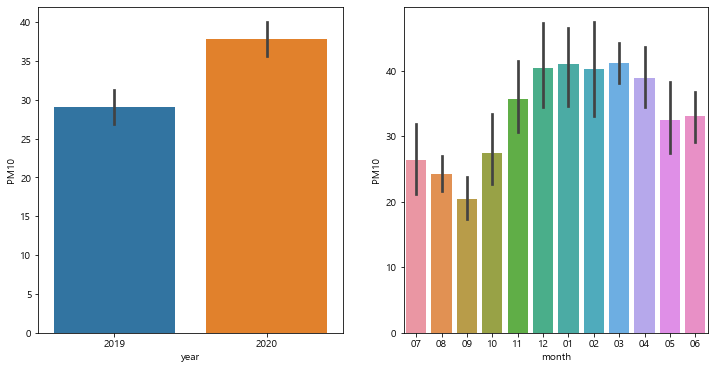

In [444]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(12,6)

sns.barplot(data=df_raw, x='year', y='PM10', ax=ax1)
sns.barplot(data=df_raw, x='month', y='PM10', ax=ax2)

- (1) 연도별 미세먼지발생량(PM10)은 2019년보다 2020년이 더 높은것을 확인할 수 있습니다.
- (2) 월별 미세먼지발생량(PM10)은 3월에 가장 높고 12월 1~4월에도 높습니다. 그리고 9월에 가장 적습니다.


2) 계절에 따른 미세먼지발생 추이

[Text(0.5, 0, '계절(겨울 : 0 , 봄 : 1 , 여름 : 2 , 가을 : 3)'),
 Text(0, 0.5, 'PM10'),
 Text(0.5, 1.0, '계절별 미세먼지발생량')]

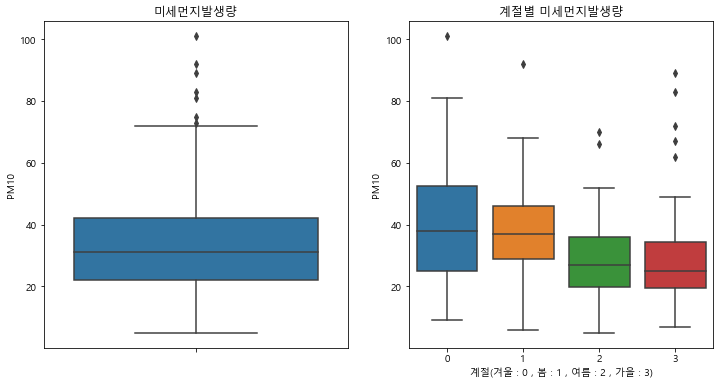

In [445]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12,6)


sns.boxplot(data=df_raw, y='PM10', orient='v', ax=axes[0])
sns.boxplot(data=df_raw, y='PM10', x='season',orient='v', ax=axes[1])


axes[0].set(ylabel = 'PM10', title ='미세먼지발생량')
axes[1].set(xlabel = '계절(겨울 : 0 , 봄 : 1 , 여름 : 2 , 가을 : 3)', ylabel = 'PM10', title ='계절별 미세먼지발생량')

- (1) 계절별 미세먼지발생량(PM10)은 겨울>봄>여름>가을 순으로 높습니다.
- (2) 겨울 과 봄은 미세먼지발생량(PM10)이 평균 이상이고, 여름과 가을은 평균 이하 입니다.


3.

---------------

In [446]:
df_raw.corr()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,RAIN_WEIGHT,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,SNOW_WEIGHT,CLOUD,TRAFIC,season
PM10,1.000000,-0.051763,0.395969,0.587857,0.428685,-0.309786,-0.150671,-0.121444,-0.100323,0.019949,-0.149803,0.253023,-0.011550,-0.020007,-0.172230,0.051359,-0.336656
O3,-0.051763,1.000000,-0.591658,-0.559331,-0.234127,0.516257,-0.125107,-0.103903,0.165216,0.268680,-0.037699,-0.534372,-0.021039,0.003900,-0.119307,-0.090385,0.164829
NO2,0.395969,-0.591658,1.000000,0.811093,0.563432,-0.237406,-0.104547,0.029298,-0.536649,-0.408342,-0.065514,0.420292,-0.100588,-0.120893,0.016722,0.255836,-0.017916
CO,0.587857,-0.559331,0.811093,1.000000,0.594374,-0.400278,-0.025228,0.043811,-0.463082,-0.343161,0.063429,0.429494,-0.030987,-0.056320,0.039501,0.086214,-0.250508
SO2,0.428685,-0.234127,0.563432,0.594374,1.000000,-0.273629,-0.278801,-0.128750,-0.252864,-0.093200,-0.302278,0.333995,-0.040844,-0.102927,-0.191234,0.209596,-0.112702
TEMP,-0.309786,0.516257,-0.237406,-0.400278,-0.273629,1.000000,0.162455,0.078213,-0.214908,-0.049674,0.404279,-0.792049,-0.221860,-0.184570,0.342033,0.007913,0.620529
RAIN,-0.150671,-0.125107,-0.104547,-0.025228,-0.278801,0.162455,1.000000,0.506352,0.167850,-0.157808,0.582779,-0.346387,0.099018,0.095215,0.607322,-0.136522,0.026443
RAIN_WEIGHT,-0.121444,-0.103903,0.029298,0.043811,-0.128750,0.078213,0.506352,1.000000,0.127875,-0.181330,0.398917,-0.237155,0.012292,0.019097,0.359667,-0.065095,0.091030
WIND,-0.100323,0.165216,-0.536649,-0.463082,-0.252864,-0.214908,0.167850,0.127875,1.000000,0.236445,-0.080166,-0.055550,0.138488,0.145407,0.019298,-0.132892,-0.134228
WIND_DIR,0.019949,0.268680,-0.408342,-0.343161,-0.093200,-0.049674,-0.157808,-0.181330,0.236445,1.000000,-0.095500,0.066025,0.107919,0.107754,-0.294381,0.069030,0.119045


C:\Users\NOH TAEYUN\AppData\Local\Temp\ipykernel_13380\1768464533.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dfcorr, dtype=np.bool)


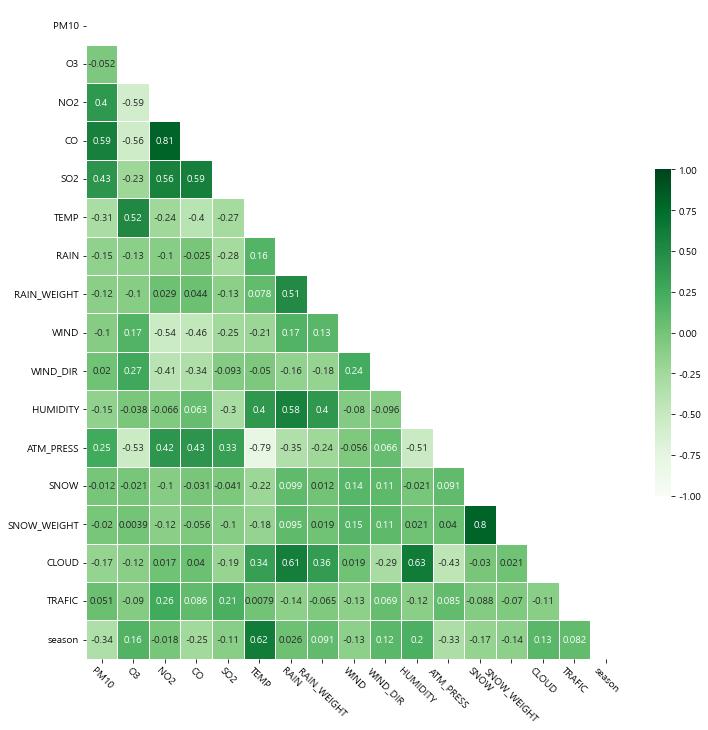

In [447]:
dfcorr = df_raw.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(12,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(dfcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(dfcorr, 
            cmap = 'Greens', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.xticks(rotation = - 45 )
plt.show()

상관계수 시각화

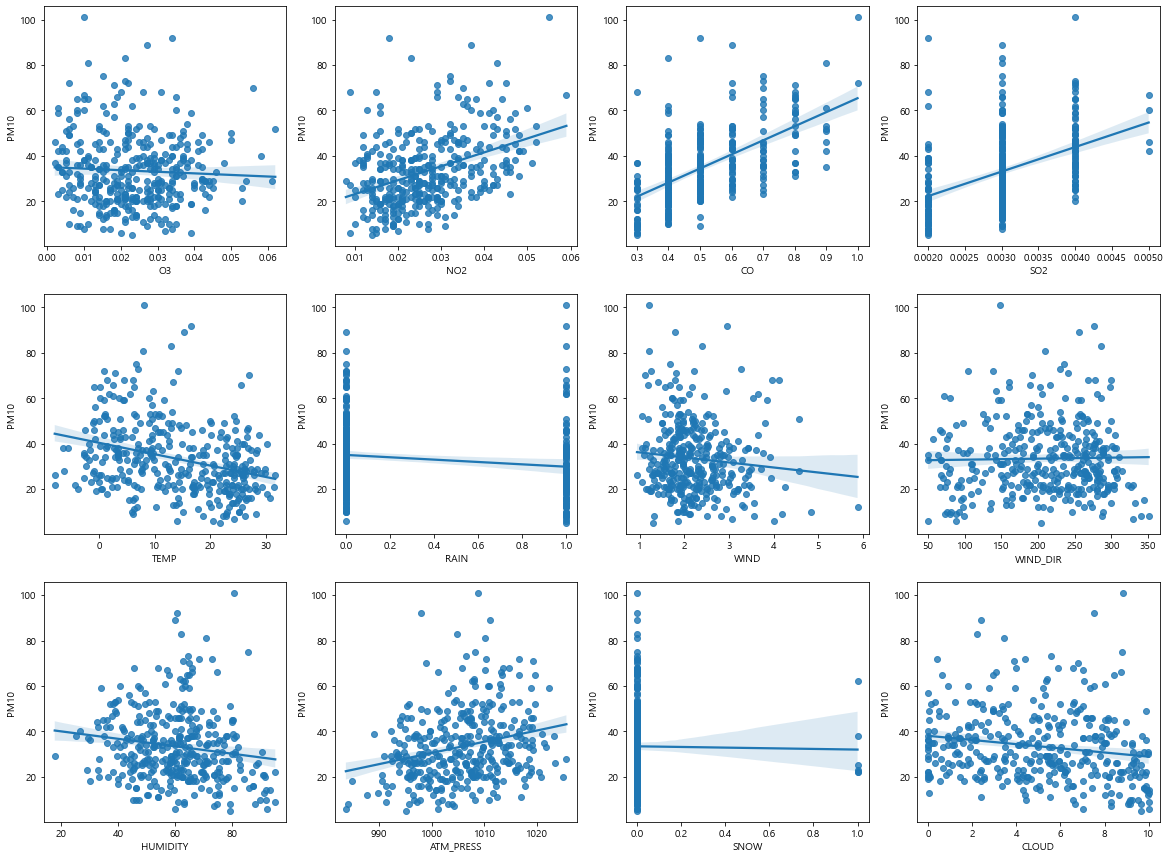

In [448]:
fig, axs = plt.subplots(figsize=(20, 15), nrows=3, ncols=4)
x_features = ['O3', 'NO2', 'CO', 'SO2',
       'TEMP', 'RAIN', 'WIND',
       'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'SNOW', 'CLOUD']


for i, feature in enumerate(x_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PM10', data = df_raw,\
               ax = axs[row][col])


### step3. 데이터 전처리 (결측치 및 이상치 처리하기)

데이터 불러오기

In [449]:
df_raw.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,RAIN_WEIGHT,WIND,...,HUMIDITY,ATM_PRESS,SNOW,SNOW_WEIGHT,CLOUD,TRAFIC,year,month,day,season
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0,0.0,2.30,...,63.2,995.1,0,0.0,5.70,9433883,2019,07,01,2
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0,0.0,2.26,...,63.2,998.6,0,0.0,3.83,9723027,2019,07,02,2
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0,0.0,1.79,...,65.3,998.3,0,0.0,6.29,9630786,2019,07,03,2
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0,0.0,2.04,...,58.6,996.6,0,0.0,2.54,9871781,2019,07,04,2
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0,0.0,1.45,...,45.5,993.5,0,0.0,3.92,10155245,2019,07,05,2


결측값 찾기

In [450]:
df_raw.isnull().sum()

MeasDate        0
PM10            1
O3              1
NO2             1
CO             55
SO2             1
TEMP            0
RAIN            0
RAIN_WEIGHT     0
WIND            0
WIND_DIR        0
HUMIDITY        0
ATM_PRESS       0
SNOW            0
SNOW_WEIGHT     0
CLOUD           0
TRAFIC          0
year            0
month           0
day             0
season          0
dtype: int64

CO 결측값 55개, PM10 결측값 1개, O3 결측값 1개, NO2 결측값 1개, SO2 결측값 1개

결측값 시각화로 보기

<AxesSubplot:>

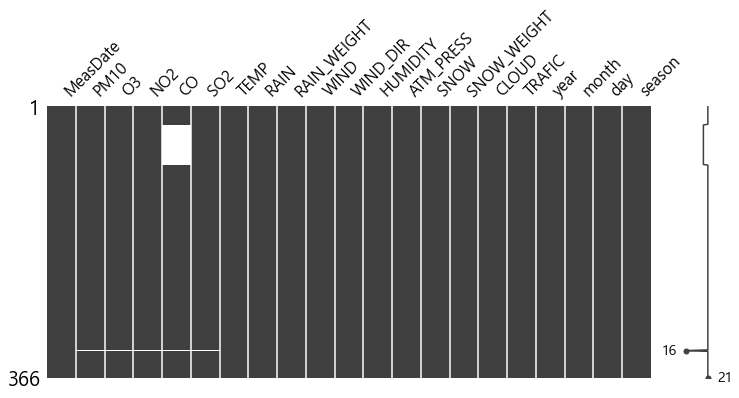

In [451]:
import missingno as msno
msno.matrix(df_raw, figsize=(12,5))

<AxesSubplot:>

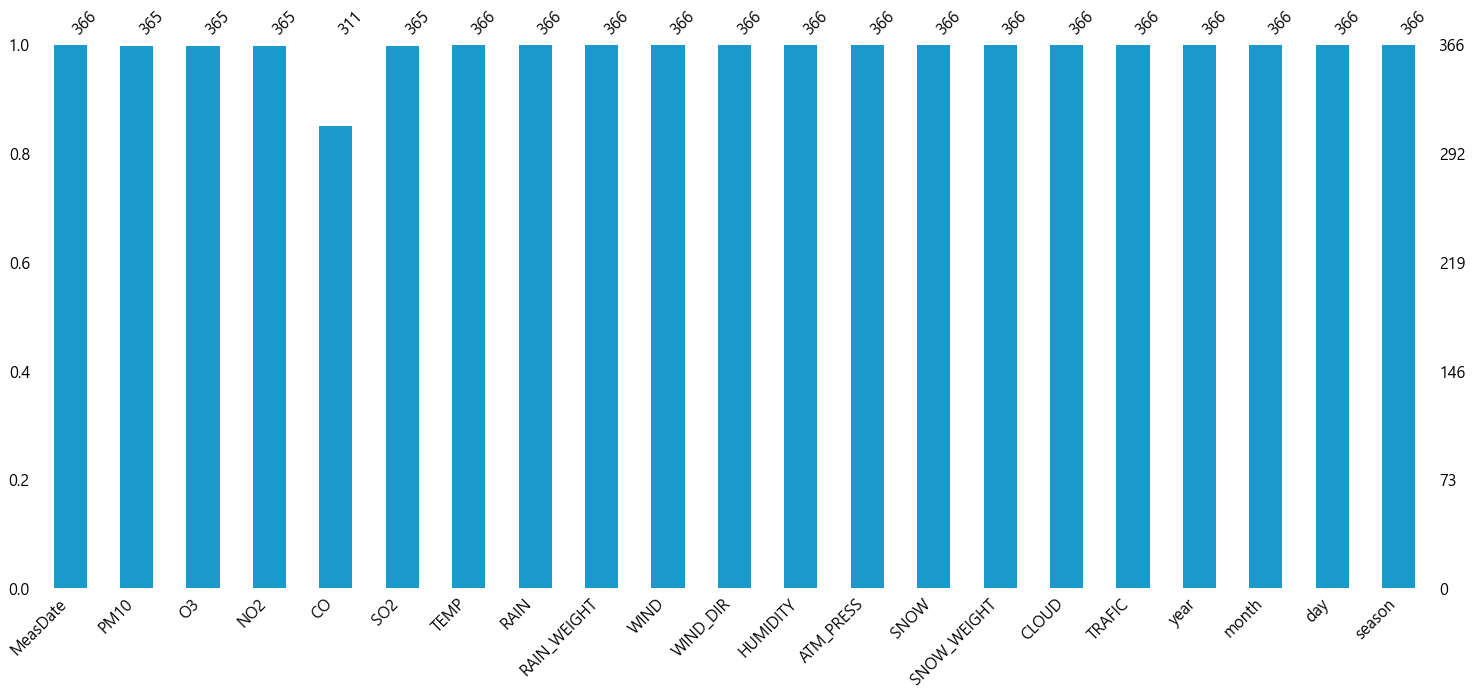

In [452]:
# Bar Chart로 지정한 트레인 데이터셋에 대한 결측치를 바 형태의 차트로 시각화 해줍니다.
msno.bar(df=df_raw.iloc[:, :], color=(0.1, 0.6, 0.8))

<AxesSubplot:>

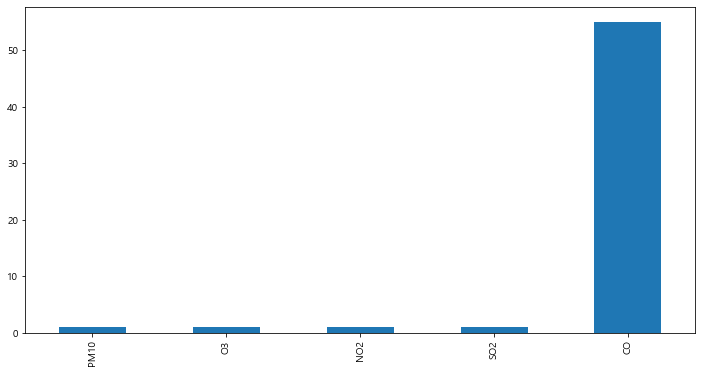

In [453]:
missing = df_raw.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (12,6))

결측값 채우기

##### 1) 5월 23일날 결측값 처리 : PM10,O3,NO2,SO2, (CO는 재외)

In [454]:
# 20년 5월의 값만 담은 데이터프레임 생성
mask = (df_raw['month'] == '05')
df_may = pd.DataFrame(df_raw.loc[mask])
df_may.tail(10)

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,RAIN_WEIGHT,WIND,...,HUMIDITY,ATM_PRESS,SNOW,SNOW_WEIGHT,CLOUD,TRAFIC,year,month,day,season
326,2020-05-22,46.0,0.026,0.031,0.5,0.004,18.58,0,0.00,1.97,...,67.3,1002.9,0,0.0,8.17,10426256,2020,05,22,1
327,2020-05-23,50.0,0.022,0.023,0.5,0.003,20.06,0,0.00,2.19,...,65.9,1001.1,0,0.0,6.88,9694759,2020,05,23,1
328,2020-05-24,NaN,NaN,NaN,NaN,NaN,17.48,1,1.45,2.85,...,83.3,999.4,0,0.0,8.21,7809968,2020,05,24,1
329,2020-05-25,45.0,0.038,0.034,0.6,0.003,16.70,0,0.00,2.07,...,80.2,1002.3,0,0.0,8.17,9914811,2020,05,25,1
330,2020-05-26,38.0,0.031,0.023,0.5,0.003,16.18,1,0.30,2.18,...,81.1,999.6,0,0.0,7.83,9929525,2020,05,26,1
331,2020-05-27,19.0,0.039,0.016,0.4,0.003,17.37,0,0.00,2.58,...,69.8,999.3,0,0.0,2.21,10126187,2020,05,27,1
332,2020-05-28,27.0,0.040,0.025,0.4,0.003,18.60,0,0.00,1.87,...,63.0,999.4,0,0.0,4.67,10248945,2020,05,28,1
333,2020-05-29,31.0,0.035,0.024,0.4,0.003,20.54,0,0.00,1.98,...,65.4,1004.5,0,0.0,1.33,10345004,2020,05,29,1
334,2020-05-30,33.0,0.046,0.026,0.5,0.003,22.63,0,0.00,1.85,...,57.3,1006.2,0,0.0,1.92,9461824,2020,05,30,1
335,2020-05-31,37.0,0.048,0.018,0.4,0.003,21.31,1,0.20,2.38,...,61.5,1001.9,0,0.0,7.29,7828085,2020,05,31,1


In [455]:
# 2020.05 데이터의 (PM10,O3,NO@,SO2) 컬럼 평균 구하기
print(df_may['PM10'].mean().round(1))
print(df_may['O3'].mean().round(3)) 
print(df_may['NO2'].mean().round(3))
print(df_may['SO2'].mean().round(3)) 

32.5
0.03
0.021
0.003


In [456]:
# 2020.05.24 의 (PM10,O3,NO@,SO2) 값을 2020.05데이터의 평균으로 대체하기
df_raw['PM10'].fillna(32.5, inplace=True)
df_raw['O3'].fillna(0.030, inplace=True)
df_raw['NO2'].fillna(0.021, inplace=True)
df_raw['SO2'].fillna(0.004, inplace=True)

In [457]:
df_raw.isnull().sum()

MeasDate        0
PM10            0
O3              0
NO2             0
CO             55
SO2             0
TEMP            0
RAIN            0
RAIN_WEIGHT     0
WIND            0
WIND_DIR        0
HUMIDITY        0
ATM_PRESS       0
SNOW            0
SNOW_WEIGHT     0
CLOUD           0
TRAFIC          0
year            0
month           0
day             0
season          0
dtype: int64

In [458]:
df_check = df_raw['month'] == '05'
df_check = pd.DataFrame(df_raw.loc[df_check])
df_check.tail(10)

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,RAIN_WEIGHT,WIND,...,HUMIDITY,ATM_PRESS,SNOW,SNOW_WEIGHT,CLOUD,TRAFIC,year,month,day,season
326,2020-05-22,46.0,0.026,0.031,0.5,0.004,18.58,0,0.00,1.97,...,67.3,1002.9,0,0.0,8.17,10426256,2020,05,22,1
327,2020-05-23,50.0,0.022,0.023,0.5,0.003,20.06,0,0.00,2.19,...,65.9,1001.1,0,0.0,6.88,9694759,2020,05,23,1
328,2020-05-24,32.5,0.030,0.021,NaN,0.004,17.48,1,1.45,2.85,...,83.3,999.4,0,0.0,8.21,7809968,2020,05,24,1
329,2020-05-25,45.0,0.038,0.034,0.6,0.003,16.70,0,0.00,2.07,...,80.2,1002.3,0,0.0,8.17,9914811,2020,05,25,1
330,2020-05-26,38.0,0.031,0.023,0.5,0.003,16.18,1,0.30,2.18,...,81.1,999.6,0,0.0,7.83,9929525,2020,05,26,1
331,2020-05-27,19.0,0.039,0.016,0.4,0.003,17.37,0,0.00,2.58,...,69.8,999.3,0,0.0,2.21,10126187,2020,05,27,1
332,2020-05-28,27.0,0.040,0.025,0.4,0.003,18.60,0,0.00,1.87,...,63.0,999.4,0,0.0,4.67,10248945,2020,05,28,1
333,2020-05-29,31.0,0.035,0.024,0.4,0.003,20.54,0,0.00,1.98,...,65.4,1004.5,0,0.0,1.33,10345004,2020,05,29,1
334,2020-05-30,33.0,0.046,0.026,0.5,0.003,22.63,0,0.00,1.85,...,57.3,1006.2,0,0.0,1.92,9461824,2020,05,30,1
335,2020-05-31,37.0,0.048,0.018,0.4,0.003,21.31,1,0.20,2.38,...,61.5,1001.9,0,0.0,7.29,7828085,2020,05,31,1


##### 2) 변수 결측치 처리 : CO

- CO의 결측치가 발생한 행을 살펴보면, 2020년 7월~9월인데,  
이기간의 데이터가 없으므로, 전체 평균, 최빈값,중앙값중 하나로 대체해야 겠다고 생각했습니다.

In [459]:
# CO컬럼의 최빈값 
df_raw['CO'].mode()

0    0.4
1    0.5
Name: CO, dtype: float64

In [460]:
# CO 컬럼의 평균값
df_raw['CO'].mean().round(1)

0.5

In [461]:
# CO 컬럼의 중앙값
df_raw['CO'].median()

0.5

- 중앙값이 0.5이지만 최빈값은 0.4와 0.5가 공동1등이라 평균값으로 대체하기로 결정


In [462]:
# CO의 결측값은 평균값으로 대체
df_raw['CO'] = df_raw['CO'].fillna(df_raw['CO'].mean().round(1))

In [463]:
df_raw.isnull().sum()

MeasDate       0
PM10           0
O3             0
NO2            0
CO             0
SO2            0
TEMP           0
RAIN           0
RAIN_WEIGHT    0
WIND           0
WIND_DIR       0
HUMIDITY       0
ATM_PRESS      0
SNOW           0
SNOW_WEIGHT    0
CLOUD          0
TRAFIC         0
year           0
month          0
day            0
season         0
dtype: int64

##### 3) 변수 삭제 : 강수량(RAIN), 적설(SNOW)

In [464]:
df_raw = df_raw.drop('RAIN', axis=1) 
df_raw = df_raw.drop('SNOW', axis=1) 
df_raw = df_raw.drop('SNOW_WEIGHT', axis=1)
df_raw = df_raw.drop('RAIN_WEIGHT', axis=1)
df_raw.head(3) # 데이터프레임 확인

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD,TRAFIC,year,month,day,season
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,2.30,249,63.2,995.1,5.70,9433883,2019,07,01,2
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,2.26,265,63.2,998.6,3.83,9723027,2019,07,02,2
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,1.79,280,65.3,998.3,6.29,9630786,2019,07,03,2


##### 3) 저장

In [465]:

# df_raw.to_csv('AIR_POLLUTION.csv', encoding='cp949', index=False)

### Step 4 다중선형 회귀분석

##### 1) 데이터 구성하기

In [507]:
from sklearn.preprocessing import scale,minmax_scale,robust_scale

In [519]:
df_raw2=robust_scale(df_raw)
df_raw2=pd.DataFrame(df_raw2,columns=df_raw.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [466]:
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형모델 formula
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리: train, test
from sklearn.model_selection import train_test_split
# 선형회귀 모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진 제거법)
from sklearn.feature_selection import RFE
# scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

##### 2) 변수 간의 경향성 파악: 그래프 분석

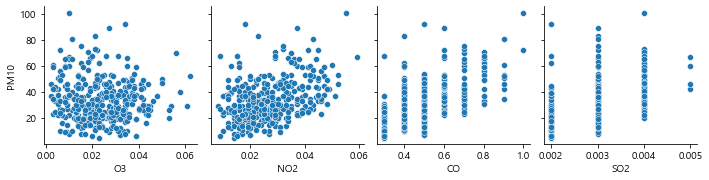

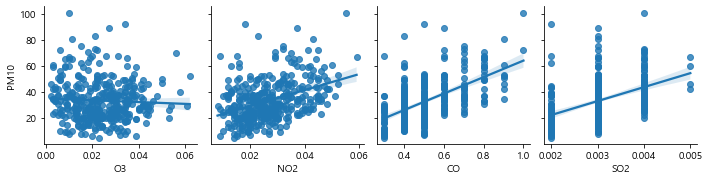

In [467]:
# 산점도 행렬(대기오염)
sns.pairplot(df_raw, y_vars="PM10", x_vars=["O3", "NO2", "CO", "SO2"], diag_kind = None)
# 회귀 적합선 추가 : kind="reg"
sns.pairplot(df_raw, y_vars="PM10", x_vars=["O3", "NO2", "CO", "SO2"], diag_kind = None, kind="reg")

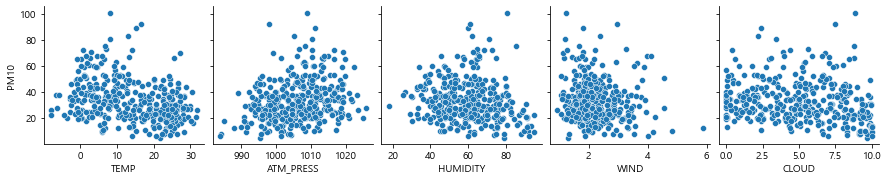

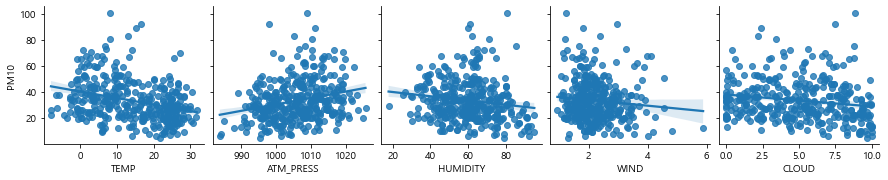

In [468]:
# 산점도 행렬(기상정보)
sns.pairplot(df_raw, y_vars="PM10", x_vars=["TEMP", "ATM_PRESS", "HUMIDITY", "WIND", "CLOUD"], diag_kind = None)
# 회귀 적합선 추가 : kind="reg"
sns.pairplot(df_raw, y_vars="PM10", x_vars=["TEMP", "ATM_PRESS", "HUMIDITY", "WIND", "CLOUD"], diag_kind = None, kind="reg")

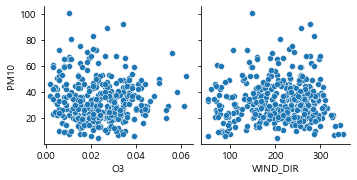

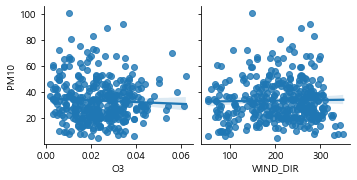

In [469]:
# 산점도 행렬(고려대상)
sns.pairplot(df_raw, y_vars="PM10", x_vars=["O3", "WIND_DIR"], diag_kind = None)

# 회귀 적합선 추가 : kind="reg"
sns.pairplot(df_raw, y_vars="PM10", x_vars=["O3", "WIND_DIR"], diag_kind = None, kind="reg")

In [470]:
# 상관관계 분석
df_raw.corr().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD,TRAFIC,season
PM10,1.000,-0.052,0.396,0.561,0.427,-0.310,-0.100,0.020,-0.150,0.253,-0.172,0.051,-0.336
O3,-0.052,1.000,-0.592,-0.513,-0.231,0.516,0.166,0.269,-0.035,-0.535,-0.118,-0.093,0.164
NO2,0.396,-0.592,1.000,0.791,0.559,-0.238,-0.537,-0.409,-0.068,0.421,0.015,0.257,-0.017
CO,0.561,-0.513,0.791,1.000,0.565,-0.362,-0.403,-0.319,0.043,0.401,0.026,0.083,-0.248
SO2,0.427,-0.231,0.559,0.565,1.000,-0.271,-0.248,-0.090,-0.294,0.329,-0.186,0.200,-0.114
TEMP,-0.310,0.516,-0.238,-0.362,-0.271,1.000,-0.215,-0.050,0.404,-0.792,0.342,0.008,0.621
WIND,-0.100,0.166,-0.537,-0.403,-0.248,-0.215,1.000,0.236,-0.080,-0.056,0.019,-0.133,-0.134
WIND_DIR,0.020,0.269,-0.409,-0.319,-0.090,-0.050,0.236,1.000,-0.096,0.066,-0.294,0.069,0.119
HUMIDITY,-0.150,-0.035,-0.068,0.043,-0.294,0.404,-0.080,-0.096,1.000,-0.512,0.629,-0.119,0.202
ATM_PRESS,0.253,-0.535,0.421,0.401,0.329,-0.792,-0.056,0.066,-0.512,1.000,-0.431,0.085,-0.335


##### 3) 회귀 모델 생성

In [471]:
# df_raw의 MeasDate 컬럼 제거
df_raw.drop(['MeasDate'], axis=1, inplace=True)

In [472]:
# df_raw의 MeasDate 컬럼 제거
df_raw.drop(['year'], axis=1, inplace=True)

In [473]:
# df_raw의 MeasDate 컬럼 제거
df_raw.drop(['month'], axis=1, inplace=True)

In [474]:
# df_raw의 MeasDate 컬럼 제거
df_raw.drop(['day'], axis=1, inplace=True)

In [475]:
# df_train, df_test = train_test_split(df_raw, test_size =0.1, random_state =1234)


In [476]:
df_raw.head()

,PM10,O3,NO2,CO,SO2,TEMP,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD,TRAFIC,season
0,29.0,0.054,0.021,0.5,0.003,24.03,2.30,249,63.2,995.1,5.70,9433883,2
1,26.0,0.053,0.020,0.5,0.003,24.29,2.26,265,63.2,998.6,3.83,9723027,2
2,30.0,0.042,0.023,0.4,0.003,24.18,1.79,280,65.3,998.3,6.29,9630786,2
3,28.0,0.034,0.026,0.4,0.003,25.35,2.04,263,58.6,996.6,2.54,9871781,2
4,29.0,0.045,0.035,0.5,0.003,27.30,1.45,175,45.5,993.5,3.92,10155245,2


In [477]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM10       366 non-null    float64
 1   O3         366 non-null    float64
 2   NO2        366 non-null    float64
 3   CO         366 non-null    float64
 4   SO2        366 non-null    float64
 5   TEMP       366 non-null    float64
 6   WIND       366 non-null    float64
 7   WIND_DIR   366 non-null    int64  
 8   HUMIDITY   366 non-null    float64
 9   ATM_PRESS  366 non-null    float64
 10  CLOUD      366 non-null    float64
 11  TRAFIC     366 non-null    int64  
 12  season     366 non-null    int32  
dtypes: float64(10), int32(1), int64(2)
memory usage: 35.9 KB


In [478]:
# 선형 회귀 분석 : formula
reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + TEMP + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + CLOUD + TRAFIC + season", data=df_raw)

#+ TRAFIC + season
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     32.16
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           1.49e-49
Time:                        17:15:39   Log-Likelihood:                -1396.5
No. Observations:                 366   AIC:                             2819.
Df Residuals:                     353   BIC:                             2870.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    240.0462    160.261      1.498      0.1

In [500]:
# 설명변수 간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop("PM10", axis=1)

# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_train_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", ascending=True).round(2)

,variable,VIF
11,TRAFIC,1.20
7,WIND_DIR,1.64
4,SO2,1.92
6,WIND,1.97
10,CLOUD,2.11
12,season,2.26
8,HUMIDITY,2.53
1,O3,2.80
3,CO,4.04
9,ATM_PRESS,4.70


In [480]:
# train_pred = reg_result.predict(df_train)
# test_pred = reg_result.predict(df_test)
# print(r2_score(df_train['PM10'],train_pred))
# print(r2_score(df_test['PM10'],test_pred))

In [481]:
# # 회귀모델 생성(설명변수 다중공선성 처리) 웨이트와 헤이트 제외(BMI와의 다중공선성이 높기때문)
# reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2  + RAIN_WEIGHT + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + SNOW_WEIGHT + CLOUD + TRAFIC + season", data=df_raw)

# reg_result = reg_model.fit()
# print(reg_result.summary())

In [482]:
# #회귀모델 생성(설명변수 간의 다중공선성 확인)
# df_raw_x = df_raw.drop(["PM10",'TEMP'],axis=1)

# df_raw_x_const = add_constant(df_raw_x)

# df_vif = pd.DataFrame()
# df_vif['variable'] = df_raw_x_const.columns
# df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values,i)for i in range(df_raw_x_const.shape[1])]
# df_vif.sort_values("VIF",inplace=True)
# df_vif.round(3)

후진제거법을 통한 중요도 변수 선택

In [503]:
# 목표 변수 분리
# df_train_y = df_train["PM10"]
# df_train_x = df_train.drop("PM10",axis =1)
df_raw_y = df_raw["PM10"]
# sklearn의 선형회귀 모델
model = LinearRegression()

# 전체변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select=5).fit(df_raw_x, df_raw_y)

# 선택된 변수
selected_cols = df_raw_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]

print("후진제거법 적용 후 선택된 변수들 : {}".format(selected_cols))
print("후진제거법 적용 후 제거된 변수들: {}".format(removed_cols))

후진제거법 적용 후 선택된 변수들 : Index(['O3', 'NO2', 'CO', 'SO2', 'WIND'], dtype='object')
후진제거법 적용 후 제거된 변수들: Index(['TEMP', 'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'CLOUD', 'TRAFIC',
       'season'],
      dtype='object')


In [504]:
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula="PM10 ~ O3 + NO2 + CO + SO2 + WIND", data=df_raw)

# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     54.42
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           5.15e-42
Time:                        17:39:31   Log-Likelihood:                -1428.7
No. Observations:                 366   AIC:                             2869.
Df Residuals:                     360   BIC:                             2893.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.3438      5.696     -7.083      0.0

<AxesSubplot:>

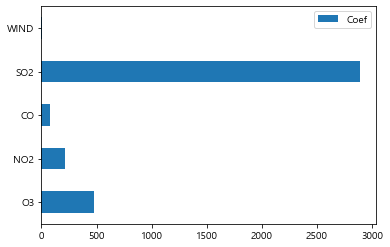

In [505]:
# 설명변수 중요도(표준화 적용 이전) -> 표준화 회귀계수 산출해야함
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]}, index=selected_cols)
df_reg_coef.plot.barh(y="Coef")

In [486]:
# 설명변수 표준화 적용 -> 표준화 회귀계수 산출 목적
scaler = StandardScaler()

# Scale 변환대상 변수 : 일반적으로 설명변수
cols = df_raw_x.columns

# Scale 변환
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

# 목표변수 추가
df_scaled['PM10'] =df_raw['PM10']
reg_model_scaled = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + WIND",
                          data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     54.42
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           5.15e-42
Time:                        17:15:40   Log-Likelihood:                -1428.7
No. Observations:                 366   AIC:                             2869.
Df Residuals:                     360   BIC:                             2893.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.4194      0.632     52.863      0.0

<AxesSubplot:>

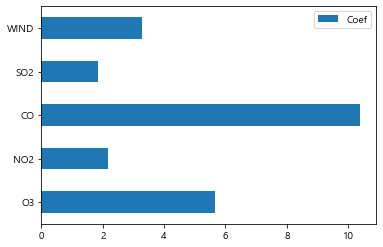

In [487]:
# 설명변수 중요도(표준화 적용 이전) -> 표준화 회귀계수 산출해야 함
df_reg_scaled_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, 
                           index=selected_cols)
df_reg_scaled_coef.plot.barh(y='Coef', legend=True)

### step 5 다중선형 회귀분석_규제화

In [488]:
# ridge, lasso, elasticnet 
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [489]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop("PM10", axis=1, inplace=False)

In [490]:
# 설명력 결과 저장
train_score = []

# a : 규제화 강도
para_alpha = [n_alpha * 0.1 for n_alpha in range(1, 11)]

for v_alpha in para_alpha:
    elastic = ElasticNet(random_state=1234, alpha=v_alpha)
    elastic.fit(df_raw_x, df_raw_y)
    train_score.append(elastic.score(df_raw_x, df_raw_y))
    
# 결과 저장
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainScore"] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.255162
1,0.2,0.214742
2,0.3,0.196938
3,0.4,0.185995
4,0.5,0.178095
5,0.6,0.171796
6,0.7,0.166471
7,0.8,0.161814
8,0.9,0.157652
9,1.0,0.153877


In [497]:
# 최종 모델
elastic_final = ElasticNet(alpha=0.1, random_state=1234)
result = elastic_final.fit(df_raw_x, df_raw_y)

df_elastic = pd.DataFrame()
df_elastic["variable"] = df_raw_x.columns
df_elastic["Coef"] = pd.DataFrame(result.coef_)
df_elastic

,variable,Coef
0,O3,0.000000e+00
1,NO2,0.000000e+00
2,CO,1.366373e+01
3,SO2,0.000000e+00
4,TEMP,-2.281366e-01
5,WIND,-2.578500e+00
6,WIND_DIR,1.927549e-02
7,HUMIDITY,-3.060469e-02
8,ATM_PRESS,-8.504273e-02
9,CLOUD,-3.509143e-01


In [498]:
# 절편값 확인
print(result.intercept_)

119.57122549975841


<AxesSubplot:>

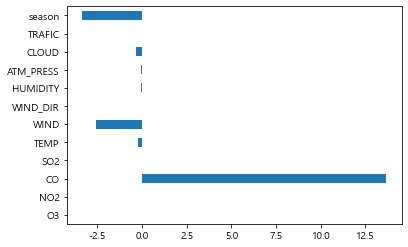

In [499]:
# 변수 중요도 확인
df_elastic_coef = pd.DataFrame({"Coef": result.coef_}, index=df_raw_x.columns)
df_elastic_coef.plot.barh(y="Coef", legend=False)

### step 6 의사결정트리

### step 7 Random Forest

### step 8 Gradient Boosting

### step 9 영향인자 선정 및 결과 해석